In [7]:
%matplotlib inline
#%matplotlib notebook

In [8]:
from IPython import display
import matplotlib.pylab as pl
import numpy as np
from IPython.display import clear_output

In [9]:
DOWNLEFT = 'DOWNLEFT'
DOWN = 'DOWN'
DOWNRIGHT = 'DOWNRIGHT'
LEFT = 'LEFT'
RIGHT = 'RIGHT'
UPLEFT = 'UPLEFT'
UP = 'UP'
UPRIGHT = 'UPRIGHT'

In [10]:
def getDirection(coord_diff):
    # Return the integer of one of the 8 directions this line is going in.
    # coord1 and coord2 are (x, y) integers coordinates.
    x, y = coord_diff

    if x == 0 and y == 0:
        return None # two coordinates are the same.
    elif x == 0 and y > 0:
        return UP
    elif x == 0 and y < 0:
        return DOWN
    elif x < 0 and y == 0:
        return LEFT
    elif x > 0 and y == 0:
        return RIGHT

    slope = float(y) / float(x)

    # Figure out which quadrant the line is going in, and then
    # determine the closest direction by calculating the slope
    if x > 0 and y > 0: # up right quadrant
        if slope < 0.4142:
            return RIGHT # slope is between 0 and 22.5 degrees
        elif slope > 2.4142:
            return UP # slope is between 67.5 and 90 degrees
        else:
            return UPRIGHT # slope is between 22.5 and 67.5 degrees
    elif x > 0 and y < 0: # down right quadrant
        if slope < -2.4142:
            return DOWN
        elif slope > -0.4142:
            return RIGHT
        else:
            return DOWNRIGHT
    elif x < 0 and y > 0: # up left quadrant
        if slope > -0.4142:
            return LEFT
        elif slope < -2.4142:
            return UP
        else:
            return UPLEFT
    elif x < 0 and y < 0: # down left quadrant
        if slope > 2.4142:
            return DOWN
        elif slope < 0.4142:
            return LEFT
        else:
            return DOWNLEFT

In [11]:
def getGesture(coords_diff):
    dirs = [getDirection(coord_diff) for coord_diff in coords_diff]
    dirs = [i for i in dirs if i != None] #remove Nones

    seg_dirs = []
    for i in range (0, len (dirs)-10, 20):
        spl = dirs[i : i+20]
        (vals ,counts) = np.unique(spl, return_counts=True)
        ind = np.argmax(counts)
        seg_dirs.append(vals[ind])

    i = 0
    while (i < len(seg_dirs) - 1):
        if seg_dirs[i] == seg_dirs[i+1]:
            del seg_dirs[i+1]
            i -= 1
        i+=1
    
    return seg_dirs

with open('/proc/mouseListener/info', 'r') as procfile:
    line = procfile.read()
    #print(line)
    if (line == ''):
        print('lol')
    lines = line.splitlines()
    print ('len = ', len(lines))
    
    x = np.array([0], dtype=np.int32)
    y = np.array([0], dtype=np.int32)
    
    for l in lines:
        l = l.split('\t')
        x = np.append(x, int(l[1]))
        y = np.append(y, int(l[2]))
    
    
    print (getGesture(list(zip(x, -y))))
    
    x = x.cumsum() 
    y = -y.cumsum()
    
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(x, y)


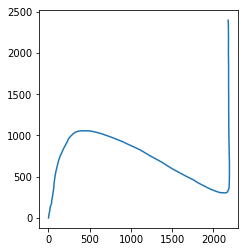

['U', 'R', 'DR', 'U']


KeyboardInterrupt: 

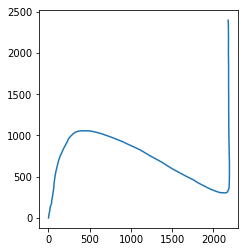

In [15]:
def getCoords(procfile):
    line = procfile.read()
    #if (line == ''):
        #print('nothing was read')
    lines = line.splitlines()
        
    x = np.array([], dtype=np.int32)
    y = np.array([], dtype=np.int32)

    for l in lines:
        l = l.split('\t')
        x = np.append(x, int(l[1]))
        y = np.append(y, int(l[2]))
    return (x,y)

def do_stuff(x_old, y_old):
    procfile = open('/proc/mouseListener/info', 'r')
    x, y = getCoords(procfile)
    if (x.size > 0):
        x_old = np.append(x_old, x)
        y_old = np.append(y_old, y)
    elif (len(x_old) > 1):
        
        g = getGesture(list(zip(x_old, -y_old)))
        x_old = x_old.cumsum() 
        y_old = -y_old.cumsum()

        try:
            pl.clf()
            display.clear_output(wait=True)
            pl.gca().set_aspect('equal', adjustable='box')
            pl.plot(x_old, y_old) 
            display.display(pl.gcf())
            print (g)
        except KeyboardInterrupt:
            return;
        
        x_old = np.array([0])
        y_old = np.array([0])
    
    procfile.close()
    s.enter(1, 1, do_stuff, (x_old, y_old))

    
import sched, time
s = sched.scheduler(time.time, time.sleep)
    
x_old = np.array([0])
y_old = np.array([0])
    
s.enter(1, 1, do_stuff, (x_old, y_old,))
s.run()